In [6]:
import pandas

In [7]:
df = pandas.read_json('tp.jsonl', lines=True)

In [8]:
df

,rank,batch_size,qo_len,kv_len,num_qo_heads,num_kv_heads,head_dim,tp_size,computed_time
0,0,1,1024,1024,32,8,128,8,0.419200
1,0,1,2048,2048,32,8,128,8,0.443616
2,0,1,4096,4096,32,8,128,8,0.422784
3,0,1,8192,8192,32,8,128,8,1.052352
4,0,1,16384,16384,32,8,128,8,2.982656
...,...,...,...,...,...,...,...,...,...
64,0,1,524288,524288,64,8,128,4,9907.157227
65,0,1,1048576,1048576,64,8,128,4,40893.000000
66,0,1,1024,1024,64,8,128,2,0.430560
67,0,1,2048,2048,64,8,128,2,0.555584


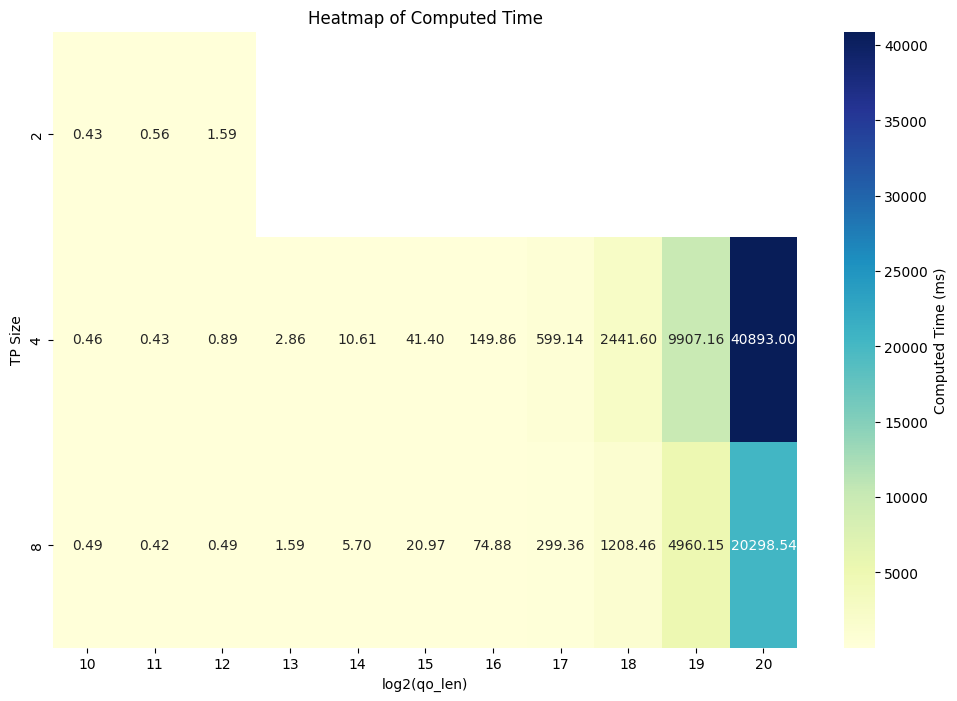

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter the DataFrame for num_qo_heads = 32
filtered_df = df[df['num_qo_heads'] == 64]

# Create a pivot table for the heatmap
pivot_table = filtered_df.pivot_table(
    index='tp_size',
    columns=np.log2(filtered_df['qo_len']).astype(int),
    values='computed_time',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Computed Time (ms)'})
plt.title('Heatmap of Computed Time')
plt.xlabel('log2(qo_len)')
plt.ylabel('TP Size')
plt.show()
